https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

https://atlantico.my.trailhead.com/pt-BR/content/bootcamp_computacao_cognitiva/modules/visao__computacional/open__cv

#Dependencies

In [ ]:
!pip install opencv-python
!pip install mahotas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import data, color
from skimage.filters import threshold_otsu
import mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 5.9 MB/s 


#Functions used

In [ ]:
def display_img(image,title='Image',x_label=None,y_label=None,cmap_type='gray',show_axis=False,colorBar=False,F_size=(8,6)):
  plt.figure(figsize=F_size)
  plt.imshow(image,cmap=cmap_type)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  if colorBar: plt.colorbar()
  if not show_axis: plt.axis('off')
  plt.show()


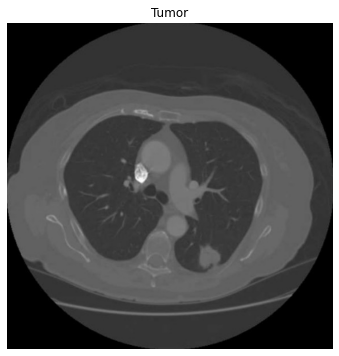

In [ ]:
tumor_picture = plt.imread("tumor_tcc.jpg")
display_img(tumor_picture, title="Tumor",colorBar=False)

#chaging the color system of the picture.

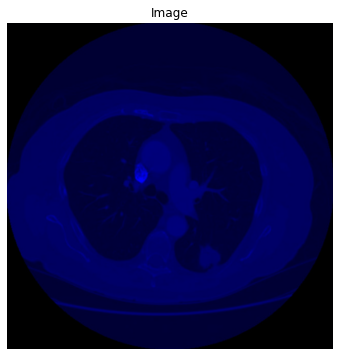

In [ ]:
tumor_picture_system_color_changed = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2HSV)
display_img(tumor_picture_system_color_changed)

#Getting each channel separately

OBS: Nothing changes once it's a white and black image.

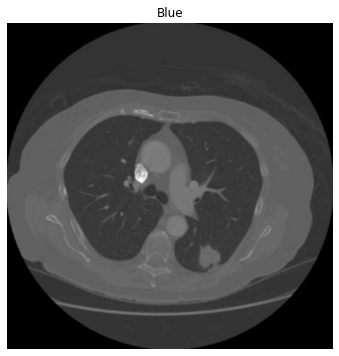

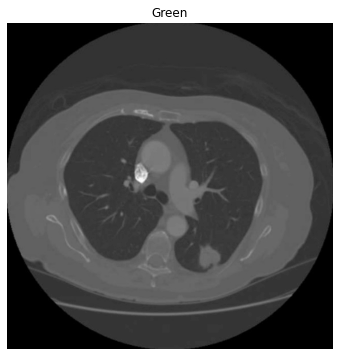

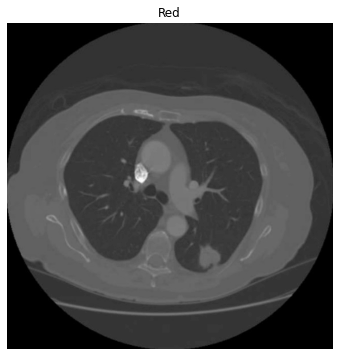

In [ ]:
(blue, green, red) = cv2.split(tumor_picture)
display_img(blue,'Blue')
display_img(green,'Green')
display_img(red,'Red')

#Histogram of color channel

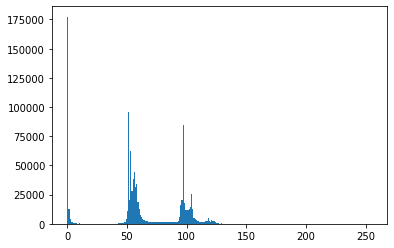

In [ ]:
plt.hist(tumor_picture.ravel(), bins=256)
plt.show()

#Blur

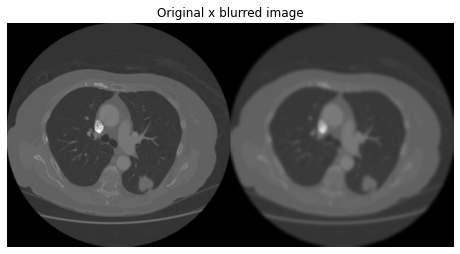

In [ ]:

tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)
tumor_picture_gray_blur = cv2.GaussianBlur(tumor_picture_gray, (21, 21), 0)

display_img( np.hstack([tumor_picture_gray, tumor_picture_gray_blur]), title='Original x blurred image')


Warning: Check whether the histogram bellow is correct.

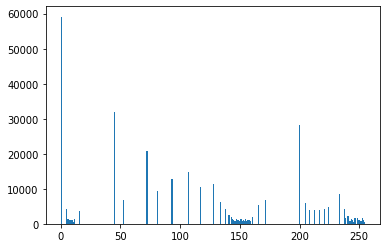

(571, 569)


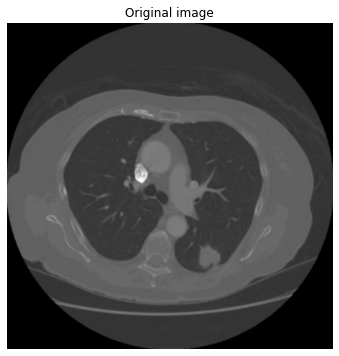

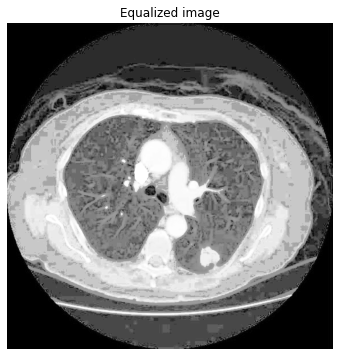

In [ ]:

tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)
tumor_picture_eq = cv2.equalizeHist(tumor_picture_gray)

plt.hist(tumor_picture_eq.ravel(), bins=256)
plt.show()

print(tumor_picture_eq.shape)
display_img(tumor_picture_gray,title='Original image')
display_img(tumor_picture_eq, title="Equalized image",colorBar=False)



#Binarization

## Fixed Threshold

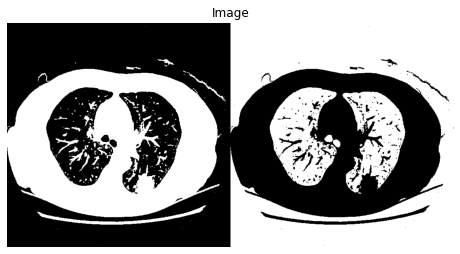

In [ ]:
Threshold = 60

tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)
(t,bin1) = cv2.threshold(tumor_picture_gray, Threshold, 255, cv2.THRESH_BINARY) 
(t,bin2) = cv2.threshold(tumor_picture_gray, Threshold, 255, cv2.THRESH_BINARY_INV) 

display_img( np.hstack([bin1, bin2]))

## Multi Threshold

The following algorithm generates various images with different fixed Thresholds in order to visualise how the images change according to the new Thresholds. You can set up the initial and final thresholds and step as follows.

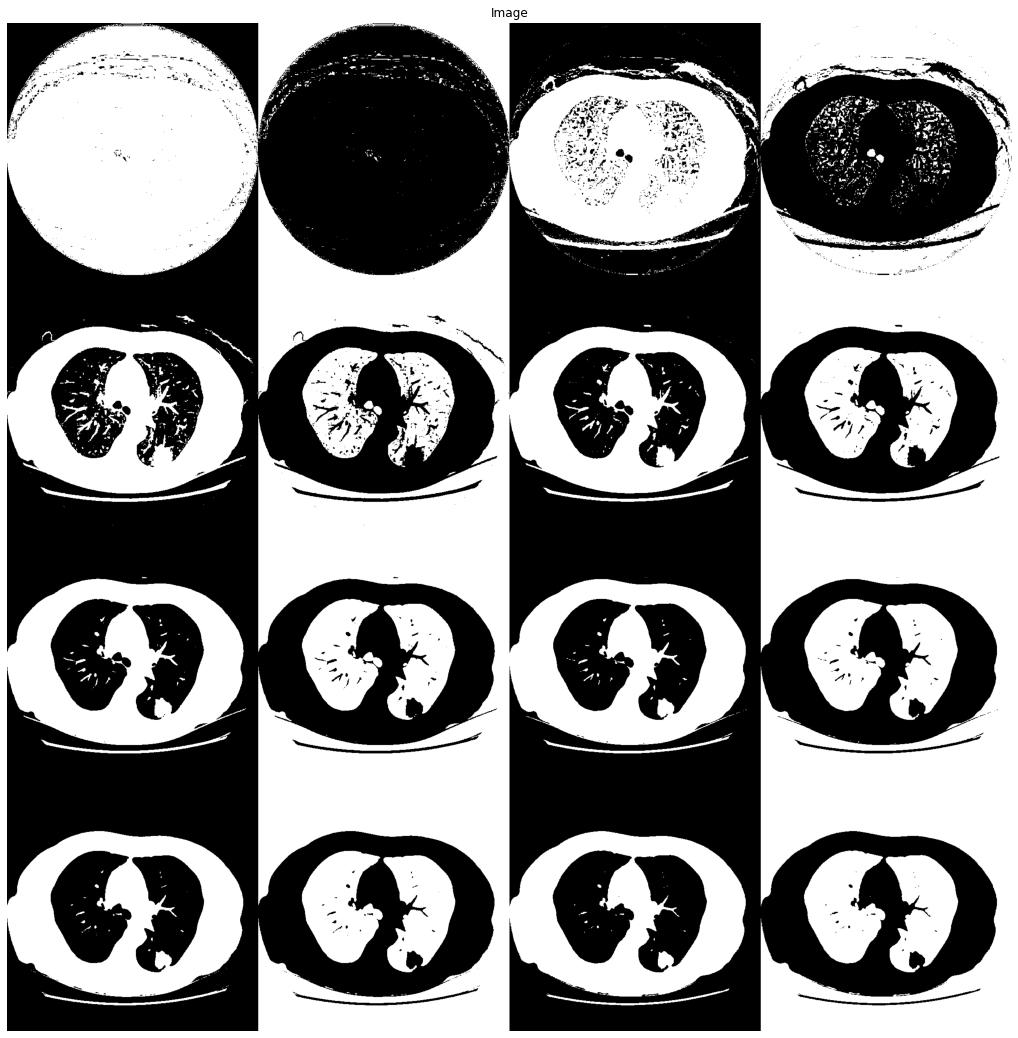

In [ ]:
matrix_of_thresholds = []
qtd_columns = 2
[initial_thresholds,final_thresholds] = [50,90]
step = 5
thresholds = initial_thresholds

while(True):
  
  row = []
  for index in range(qtd_columns):
    row.append(cv2.threshold(tumor_picture_gray, thresholds, 255, cv2.THRESH_BINARY)[1])
    row.append(cv2.threshold(tumor_picture_gray, thresholds, 255, cv2.THRESH_BINARY_INV)[1])
    thresholds+=step

  matrix_of_thresholds.append(np.hstack(row))
  if thresholds>=final_thresholds: break

result = np.vstack(matrix_of_thresholds)

display_img(result,F_size=(18,28))

##Threshold by using Otsu and Riddler-Calvard

I still need to figure out what's going on wrong here.

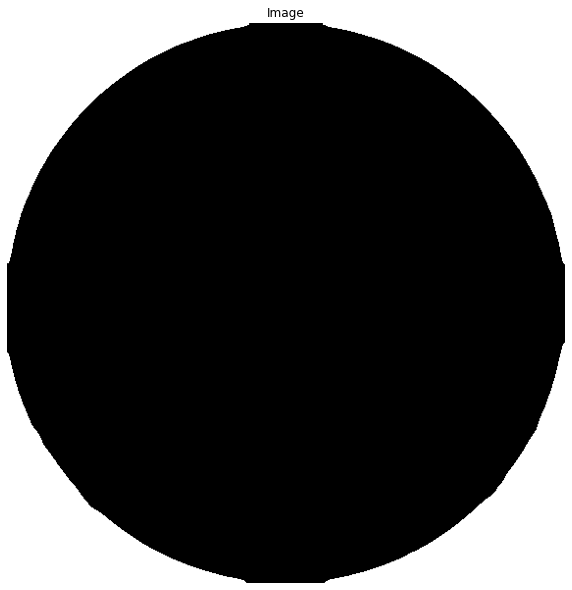

In [ ]:
tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)

tumor_picture_gray = cv2.GaussianBlur(tumor_picture_gray, (15, 15), 0)
T = mahotas.thresholding.otsu(tumor_picture_gray) 
temp = tumor_picture_gray.copy() 
temp[temp > T] = 255 
temp[temp < 255] = 0 
temp = cv2.bitwise_not(temp) 
T = mahotas.thresholding.rc(tumor_picture_gray) 
temp2 = tumor_picture_gray.copy() 
temp2[temp2 > T] = 255 
temp2[temp2 < 255] = 0 
temp2 = cv2.bitwise_not(temp2) 

result = np.vstack([temp,temp2])

display_img(temp,F_size=(10,15))

##Adaptive Threshold

According to https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html ,

The adaptiveMethod decides how the threshold value is calculated:

cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

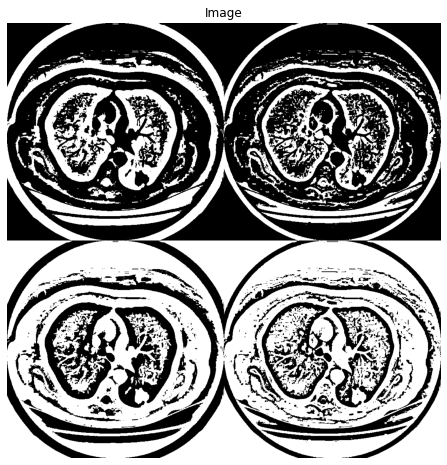

In [ ]:
blocksize = 41
central_value = 2
tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)

th1 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,blocksize,central_value)
th2 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,blocksize,central_value)
th3 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blocksize,central_value)
th4 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blocksize,central_value)

result = np.vstack([  np.hstack([th1, th2]),  np.hstack([th3, th4])  ])   

display_img(result,F_size=(12,8))


#Border detection



##Sobel

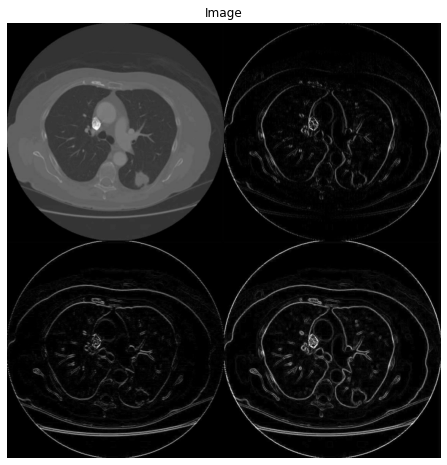

In [ ]:
tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)
sobelX = cv2.Sobel(tumor_picture_gray, cv2.CV_64F, 1, 0) 
sobelX = np.uint8(np.absolute(sobelX))
sobelY = cv2.Sobel(tumor_picture_gray, cv2.CV_64F, 0, 1)
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)

result = np.vstack([  np.hstack([tumor_picture_gray,sobelX]),np.hstack([sobelY, sobel])  ])   

display_img(result,F_size=(12,8))

## Laplacian Filter

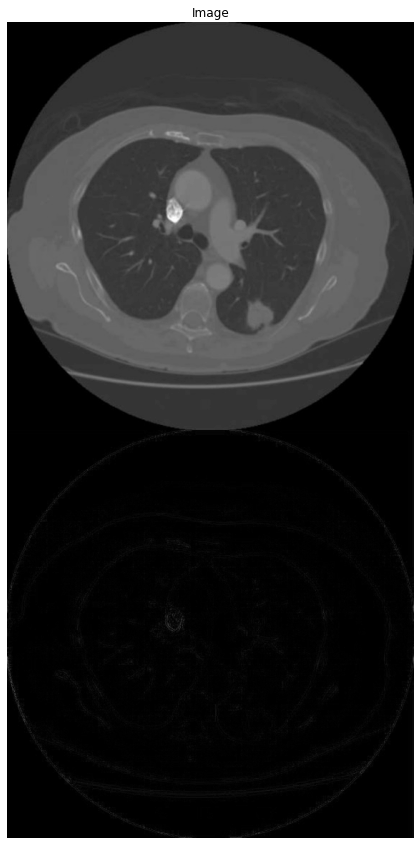

In [ ]:
lap = cv2.Laplacian(tumor_picture_gray, cv2.CV_64F) 
lap = np.uint8(np.absolute(lap)) 
result = np.vstack([tumor_picture_gray, lap])  
display_img(result,F_size=(18,15))

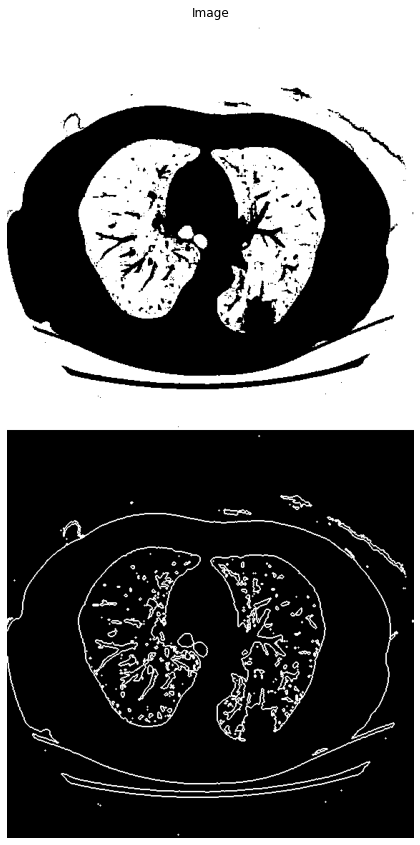

In [ ]:
threshold=60

limiar_threshold = cv2.threshold(tumor_picture_gray, threshold, 255, cv2.THRESH_BINARY_INV)[1]
lap = cv2.Laplacian(limiar_threshold, cv2.CV_64F) 
lap = np.uint8(np.absolute(lap)) 
result = np.vstack([limiar_threshold, lap])  
display_img(result,F_size=(18,15))

## Canny

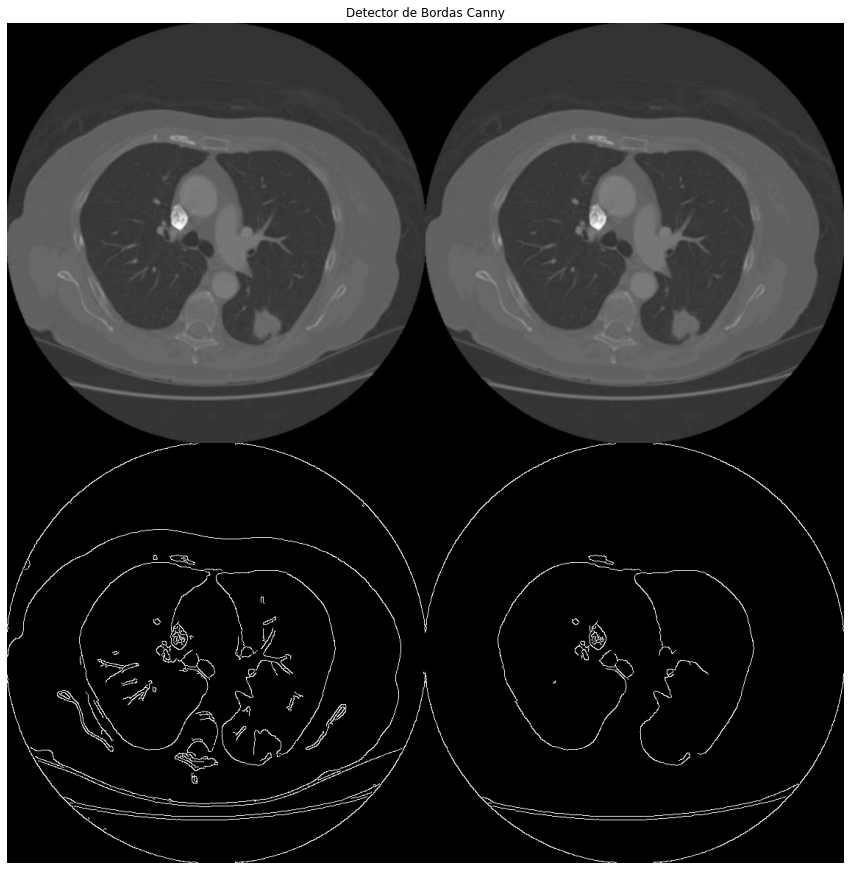

In [ ]:
tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)
canny1 = cv2.Canny(tumor_picture_gray, 20, 120) 
canny2 = cv2.Canny(tumor_picture_gray, 50, 200) 
result = np.vstack([  np.hstack([tumor_picture_gray,    tumor_picture_gray ]),  np.hstack([canny1, canny2])  ])  
display_img(result, title = "Detector de Bordas Canny",F_size=(15,20)) 

#Pipelines

## Fixed threshold + Sobel

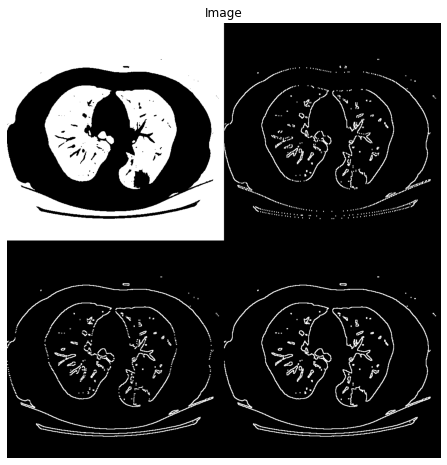

In [ ]:
threshold = 65

tumor_picture_threshold = cv2.threshold(tumor_picture_gray, threshold, 255, cv2.THRESH_BINARY_INV)[1]

sobelX = cv2.Sobel(tumor_picture_threshold, cv2.CV_64F, 1, 0) 
sobelX = np.uint8(np.absolute(sobelX))
sobelY = cv2.Sobel(tumor_picture_threshold, cv2.CV_64F, 0, 1)
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)

result = np.vstack([  np.hstack([tumor_picture_threshold,sobelX]),np.hstack([sobelY, sobel])  ])   

display_img(result,F_size=(12,8))

## Adaptive Threshold + Sobel

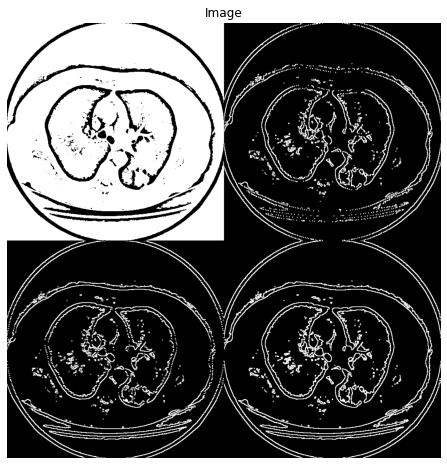

In [ ]:
blocksize = 51
central_value = 7
th4 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blocksize,central_value)

sobelX = cv2.Sobel(th4, cv2.CV_64F, 1, 0) 
sobelX = np.uint8(np.absolute(sobelX))
sobelY = cv2.Sobel(th4, cv2.CV_64F, 0, 1)
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)

result = np.vstack([  np.hstack([th4,sobelX]),np.hstack([sobelY, sobel])  ])   

display_img(result,F_size=(12,8))